# Baird’s Counterexample

A simple complete example of divergence is Baird’s counterexample. Consider the episodic 7-state, 2-action MDP shown in Figure 11.1. 
- The dashed action takes the system to 1 of the 6 upper states with equal probability, whereas the solid action takes the
 system to the 7th state.
- The behavior policy $b$ selects the dashed and solid actions with probabilities $\dfrac{6}{7}$ and $\dfrac{1}{7}$, so that the next-state distribution under it is uniform (the same for all non-terminal states), which is also the starting distribution for each episode.
- The target policy $\pi$ always takes the solid action, and so the on-policy distribution (for $\pi$) is concentrated in the 7th state.
- The reward is 0 on all transitions.
- The discount rate is $\gamma=0.99$.

In [1]:
from IPython.display import Image

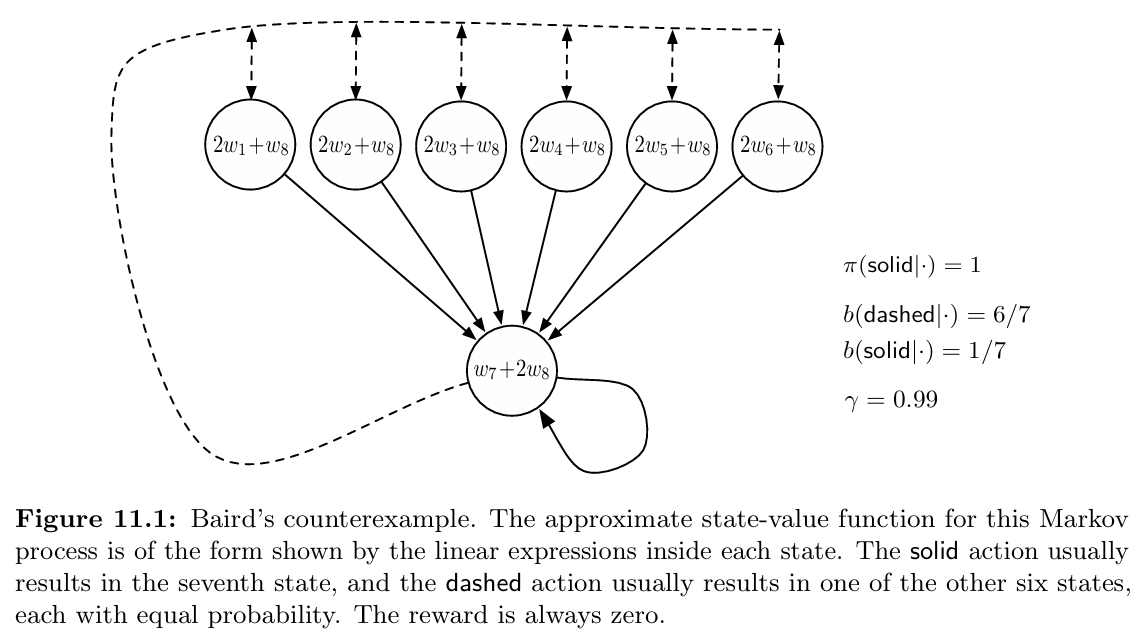

In [2]:
Image(filename="../book_images/Figure_11_1.PNG")

Consider estimating the state-value under the linear parameterization indicated by the expression shown in each state circle.
- For example, the leftmost state's:
  - feature vector is: $\mathbf{x}(s=1) = (2,0,0,0,0,0,0,1)^T$,
  - in case of the overall weight vector $\mathbf{w} = (w_1, w_2, ..., w_8)^T \in R^8$, the estimated value is:
$ \hat{v} (s,\mathbf{w}) = \mathbf{w}^T \mathbf{x}(s) = \sum\limits_{i=1}^{d=8} w_i x_i(s) = w_1x_1(s) + w_2x_2(s) + ... + w_8x_8(s) = 2w_1+w_8 $.
- The reward is 0 on all transitions, so the true VF is $v_{\pi}(s) = 0, \forall s$, which can be exactly approximated if $\mathbf{w=0}$.
- In fact, there are many solutions, as there are more components to the weight vector than there are non-terminal states $(d = 8 > 7 = |S|)$.
- Moreover, the set of feature vectors, $\{ \mathbf{x}(s): s \in S \}$, is a linearly independent set.
- In all these ways this task seems a favorable case for linear function approximation.

- If we apply semi-gradient TD(0) to this problem (11.2), then the weights diverge to infinity, as shown in Figure 11.2 (left).
  - The instability occurs for any positive step size, no matter how small.
- In fact, it even occurs if an expected update is done as in DP, as shown in Figure 11.2 (right).
  - That is, if the weight vector, $w_k$, is updated for all states at the same time in a semi-gradient way, using the DP (expectation-based) target:
$ \mathbf{w}_{k+1} \dot{=} \mathbf{w}_{k} + \dfrac{\alpha}{|S|} \sum\limits_{s} (E_\pi[R_{t+1} + \gamma \hat{v}(S_{t+1}, \mathbf{w}_{k}) | S_t = s] - \hat{v}(s, \mathbf{w}_{k})) \nabla\hat{v}(s, \mathbf{w}_{k}) $.
  - In this case, there is no randomness and no asynchrony, just as in a classical DP update.
  - The method is conventional except in its use of semi-gradient function approximation.
  - Yet still the system is unstable.

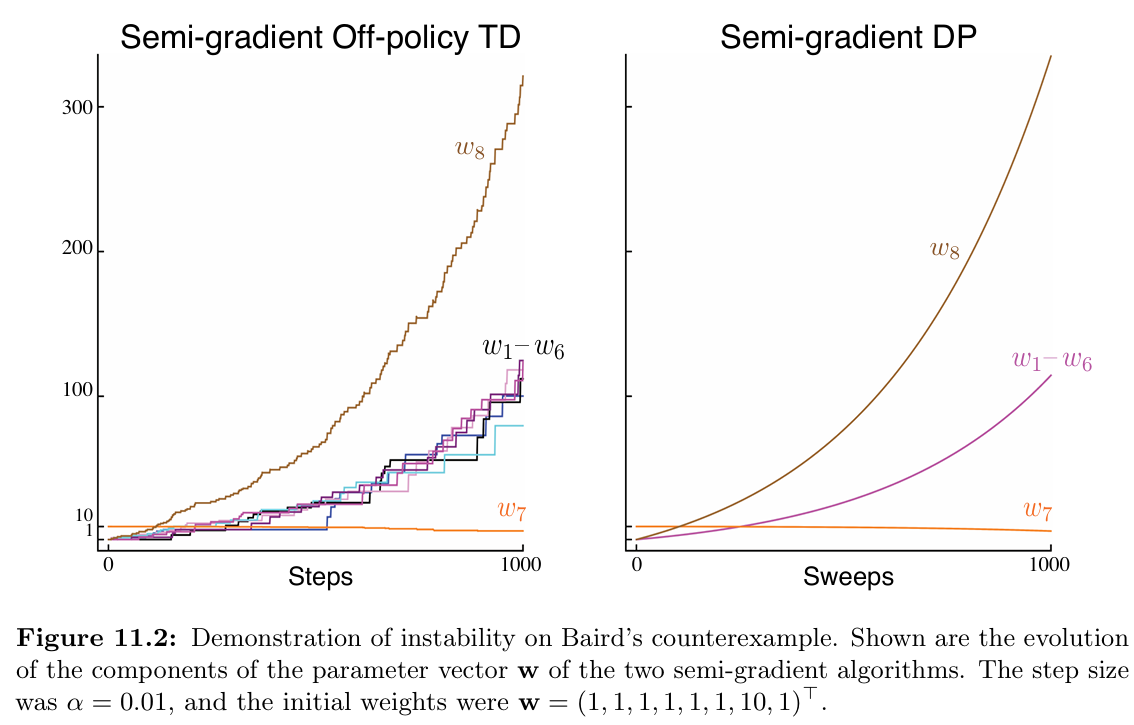

In [3]:
Image(filename="../book_images/Figure_11_2.PNG")

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [5]:
from src.counter_example import feature_vector_size, states, semi_gradient_off_policy_TD, semi_gradient_DP

## Figure 11.2 (left): Semi-gradient Off-policy TD

In [6]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)

<Axes: >

In [7]:
# Initialize the weights vector (denoted as for 𝒘)
weights = np.ones(feature_vector_size)
weights[6] = 10

In [8]:
# Step-size parameter (denoted as 𝛼)
step_size = 0.01

# Number of steps
steps = 1000

In [9]:
# Create a weights matrix of size feature vector size * number of steps filled with 0s
weights_matrix = np.zeros((feature_vector_size, steps))

# Choose a random state
state = np.random.choice(states)

In [10]:
# For every step
for step in tqdm(range(steps)):
    # get the next state
    state = semi_gradient_off_policy_TD(state, weights, step_size)
    
    # record weights vector into weights matrix
    weights_matrix[:, step] = weights

100%|██████████| 1000/1000 [00:00<00:00, 105442.81it/s]


In [11]:
# Plotting
for i in range(feature_vector_size):
    plt.plot(weights_matrix[i, :], label=fr"$w_{i + 1}$")

In [12]:
plt.xlabel("Steps")
plt.ylabel("Weights")
plt.title("Semi-gradient Off-policy TD")
plt.legend()

## Figure 11.2 (right): Semi-gradient DP

In [13]:
plt.subplot(2, 1, 2)

<Axes: >

In [14]:
# Initialize the weights vector (denoted as for 𝒘)
weights = np.ones(feature_vector_size)
weights[6] = 10

In [15]:
# Step-size parameter (denoted as 𝛼)
step_size = 0.01

# Number of sweeps
sweeps = 1000

# Create a weights matrix of size feature vector size * number of sweeps filled with 0s
weights_matrix = np.zeros((feature_vector_size, sweeps))

In [16]:
# For every sweep
for sweep in tqdm(range(sweeps)):
    # update weights vector
    semi_gradient_DP(weights, step_size)
    
    # record weights vector into weights matrix
    weights_matrix[:, sweep] = weights

100%|██████████| 1000/1000 [00:00<00:00, 36469.99it/s]


In [17]:
# Plotting
for i in range(feature_vector_size):
    plt.plot(weights_matrix[i, :], label=fr"$w_{i + 1}$")

In [18]:
plt.xlabel("Sweeps")
plt.ylabel("Weights")
plt.title("Semi-gradient DP")
plt.legend()

In [19]:
plt.savefig("../generated_images/figure_11_2.png")
plt.close()